## Project 2 - Ames Housing Data and Kaggle Challenge

Purpose of project: You are tasked with creating a regression model based on the Ames Housing Dataset. This model will predict the price of a house at sale.

Sam Connelly 

Due: May 18, 2018 

## Import packages and data

In [1578]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import SGDClassifier

sns.set_style('darkgrid')

In [1579]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)

In [1580]:
sample_submission = pd.read_csv('/Users/samconnelly/Downloads/sample_sub_reg.csv')

In [1581]:
ames_housing_train = pd.read_csv('/Users/samconnelly/Downloads/Train (1).csv')

In [1582]:
ames_housing_test = pd.read_csv('/Users/samconnelly/Downloads/test.csv')

## Preliminary comments 

From a preliminary combing of the data, I made note of a n abridged list of price predictors which I believed would have the greatest impact on housing price:

1) MS zoning: Identifies the general zoing classification of the sale

2) Lot frontage: Linear feet of street connected to property 

3) Lot area: Lot size in sqaure feet

4) Street: Type of road in sqaure feet

5) Neighborhood: Physical locations within Ames city limits

6) Building type: Type of dwelling

7) House Style: Style of dwelling

8) Basement condition: General condition of the basement

9) GR living area: Above grade living area square feet

10) Full bath: Full bathrooms above grade

11) Bedroom: Number of bedrooms above basement level

12) Kitchen Quality

13) Functional: Home Functionality Rating 

14) Yrsold: Year Sold

15) Sale type: Type of sale 

16) LandContour: Flatness of the property 

17) Overall Condition: Overall condition rating

18) Exterior Condition: Presesnt condition of the material on the exterior 

19) 1st FlfSF: First floor square feet

20) TotRmsAbvGrd: Total rooms above grade (does not incude bathrooms)

21) MoSold

## EDA

In [1584]:
ames_housing_train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [1585]:
ames_housing_train.shape

(2051, 81)

In [1586]:
ames_housing_train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [1587]:
ames_housing_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [1588]:
ames_housing_train.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

In [1589]:
ames_housing_train.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

In [1590]:
ames_housing_train.corr()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Id,1.000000,0.175793,0.026543,-0.024967,0.032872,-0.061483,-0.026096,-0.064444,-0.090040,-0.035493,-0.045878,0.000723,0.008555,-0.038346,-0.022650,-0.008388,0.011719,-0.023881,-0.033385,0.014381,-0.059086,-0.042054,0.010605,-0.002400,-0.009092,-0.037560,-0.050730,-0.048666,-0.045201,-0.009045,0.001382,0.033747,-0.022791,0.009758,0.055696,-0.012683,0.127723,-0.975747,-0.051398
PID,0.175793,1.000000,-0.003632,-0.091291,0.024135,-0.265863,0.106861,-0.347039,-0.176666,-0.247959,-0.086522,-0.013144,-0.111281,-0.203795,-0.145862,-0.005598,0.072268,-0.112936,-0.030554,-0.001946,-0.179370,-0.163975,0.009122,0.068416,-0.084999,-0.120710,-0.251257,-0.228368,-0.200891,-0.041221,-0.081129,0.150179,-0.024679,-0.042030,0.005825,0.004223,-0.032735,0.008476,-0.255052
MS SubClass,0.026543,-0.003632,1.000000,-0.389790,-0.245484,0.035763,-0.070141,0.035983,0.044836,-0.004047,-0.060854,-0.068265,-0.139911,-0.226038,-0.246212,0.305771,0.031091,0.068210,0.025055,-0.017249,0.142087,0.179404,-0.003516,0.252111,0.034490,-0.055118,0.084954,-0.049148,-0.108228,0.001622,-0.020289,-0.039842,-0.030088,-0.038819,-0.004585,-0.027485,0.013027,-0.032870,-0.087335
Lot Frontage,-0.024967,-0.091291,-0.389790,1.000000,0.574024,0.194808,-0.054455,0.109504,0.085052,0.218218,0.214178,0.036740,0.127605,0.356584,0.463900,0.013700,-0.000300,0.383856,0.111441,-0.030858,0.152812,0.035842,0.220414,0.015856,0.362704,0.253456,0.067865,0.297143,0.358457,0.115180,0.184958,-0.003302,0.031855,0.074819,0.156575,0.051676,-0.017389,0.009112,0.341842
Lot Area,0.032872,0.024135,-0.245484,0.574024,1.000000,0.105824,-0.019185,0.036002,0.050771,0.169379,0.215430,0.041717,0.041184,0.277175,0.381593,0.029398,0.001273,0.327427,0.116128,0.029980,0.125601,0.049995,0.139060,-0.013484,0.238724,0.289467,0.004882,0.214954,0.263296,0.155623,0.140864,0.014139,0.019553,0.067714,0.115102,0.093922,0.003197,-0.029454,0.296566
Overall Qual,-0.061483,-0.265863,0.035763,0.194808,0.105824,1.000000,-0.082770,0.602964,0.584654,0.438685,0.278742,-0.028199,0.275773,0.548742,0.477136,0.228152,-0.052338,0.566701,0.175171,-0.047318,0.515080,0.274859,0.053373,-0.170964,0.382025,0.388920,0.574553,0.587423,0.563814,0.257081,0.308855,-0.154554,0.031938,0.048752,0.006558,0.022099,0.019242,-0.011578,0.800207
Overall Cond,-0.026096,0.106861,-0.070141,-0.054455,-0.019185,-0.082770,1.000000,-0.370988,0.042614,-0.135878,-0.045768,0.047810,-0.130521,-0.158643,-0.150938,0.010912,0.004753,-0.109804,-0.039113,0.100324,-0.219189,-0.093266,-0.009908,-0.095725,-0.093576,-0.006463,-0.331765,-0.168513,-0.137917,0.011034,-0.052266,0.108320,0.026907,0.047359,-0.005806,0.014269,-0.003144,0.047664,-0.097019
Year Built,-0.064444,-0.347039,0.035983,0.109504,0.036002,0.602964,-0.370988,1.000000,0.629116,0.329741,0.275440,-0.021031,0.136662,0.410254,0.323315,0.022313,-0.159403,0.258838,0.215200,-0.031464,0.480169,0.283207,-0.042149,-0.127162,0.137783,0.168848,0.825316,0.542544,0.487177,0.216339,0.207798,-0.380082,0.016104,-0.037866,0.003728,0.000626,-0.007083,-0.003559,0.571849
Year Remod/Add,-0.090040,-0.176666,0.044836,0.085052,0.050771,0.584654,0.042614,0.629116,1.000000,0.211443,0.166680,-0.057163,0.160066,0.308545,0.244190,0.159605,-0.066577,0.322407,0.153507,-0.037923,0.471555,0.224106,-0.019748,-0.135926,0.202397,0.138858,0.674024,0.441796,0.398999,0.216271,0.264476,-0.237523,0.040416,-0.041211,-0.022382,-0.001704,0.011568,0.042744,0.550370
Mas Vnr Area,-0.035493,-0.247959,-0.004047,0.218218,0.169379,0.438685,-0.135878,0.329741,0.211443,1.000000,0.321807,-0.016756,0.085853,0.4085

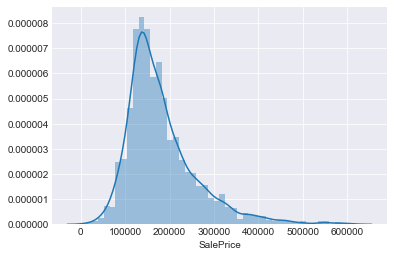

In [1591]:
sns.distplot(ames_housing_train['SalePrice'])

## Data Cleaning

In [1592]:
ames_housing_train = ames_housing_train.drop(['BsmtFin Type 2', 
                                              'BsmtFin SF 2',
                                              'Pool QC', 
                                              'Alley', 
                                              'Fence', 
                                              'Misc Feature',
                                             'Fireplace Qu',
                                              'Street',
                                              'Utilities',
                                              'Condition 2',
                                              'Roof Matl',
                                              'Heating'
                                             
], axis=1)

ames_housing_test = ames_housing_test.drop(['BsmtFin Type 2', 
                                              'BsmtFin SF 2',
                                              'Pool QC', 
                                              'Alley', 
                                              'Fence', 
                                              'Misc Feature',
                                             'Fireplace Qu',
                                              'Street',
                                              'Utilities',
                                              'Condition 2',
                                              'Roof Matl',
                                              'Heating'
                                             
], axis=1)

In [1593]:
ames_housing_test.shape

(879, 68)

In [1594]:
ames_housing_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Land Contour,Lot Config,Land Slope,Neighborhood,Condition 1,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,IR1,Lvl,CulDSac,Gtl,Sawyer,RRAe,1Fam,2Story,6,8,1976,2005,Gable,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,192.0,725.0,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,IR1,Lvl,CulDSac,Gtl,SawyerW,Norm,1Fam,2Story,7,5,1996,1997,Gable,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,276.0,913.0,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Reg,Lvl,Inside,Gtl,NAmes,Norm,1Fam,1Story,5,7,1953,2007,Gable,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,326.0,1057.0,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Reg,Lvl,Inside,Gtl,Timber,Norm,1Fam,2Story,5,5,2006,2007,Gable,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,384.0,384.0,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,IR1,Lvl,Inside,Gtl,SawyerW,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,676.0,676.0,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,3,2010,WD,138500


In [1595]:
ames_housing_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Land Contour,Lot Config,Land Slope,Neighborhood,Condition 1,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Reg,Lvl,Inside,Gtl,OldTown,Norm,2fmCon,2Story,6,8,1910,1950,Gable,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0.0,1020.0,1020.0,Gd,N,FuseP,908,1020,0,1928,0.0,0.0,2,0,4,2,Fa,9,Typ,0,Detchd,1910.0,Unf,1.0,440.0,Po,Po,Y,0,60,112,0,0,0,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,IR1,Lvl,Inside,Gtl,Sawyer,Norm,Duplex,1Story,5,4,1977,1977,Gable,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0.0,1967.0,1967.0,TA,Y,SBrkr,1967,0,0,1967,0.0,0.0,2,0,6,2,TA,10,Typ,0,Attchd,1977.0,Fin,2.0,580.0,TA,TA,Y,170,0,0,0,0,0,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,IR1,Lvl,Inside,Gtl,Gilbert,Norm,1Fam,2Story,7,5,2006,2006,Gable,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554.0,100.0,654.0,Ex,Y,SBrkr,664,832,0,1496,1.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,2006.0,RFn,2.0,426.0,TA,TA,Y,100,24,0,0,0,0,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Reg,Lvl,Inside,Gtl,OldTown,Norm,1Fam,1Story,5,6,1923,2006,Gable,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0.0,968.0,968.0,TA,Y,SBrkr,968,0,0,968,0.0,0.0,1,0,2,1,TA,5,Typ,0,Detchd,1935.0,Unf,2.0,480.0,Fa,TA,N,0,0,184,0,0,0,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,IR1,Lvl,Inside,Gtl,NAmes,Norm,1Fam,1Story,6,5,1963,1963,Gable,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609.0,785.0,1394.0,Gd,Y,SBrkr,1394,0,0,1394,1.0,0.0,1,1,3,1,TA,6,Typ,2,Attchd,1963.0,RFn,2.0,514.0,TA,TA,Y,0,76,0,0,185,0,0,7,2009,WD



## Checking for trend in sale price/how it lines up with the cyclicle housing market
With  evidence pointing to the fact that the housing market is one of the most cyclical markets in the US, I believed it would be reasonably to expect some correlation between housing prices, number of houses sold and year sold. My original hypotheses was that the Ames market would act similary to  to expect that there would be a dig in activity and sizable dip in sales price. From there goal was to set a prediction feature which would make prediction of housing price based off where we were in the cycle. 

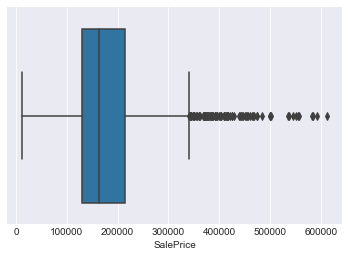

In [1603]:
sns.boxplot(ames_housing_train['SalePrice'])

In [1604]:
ames_housing_train['Yr Sold'].value_counts()

2007    498
2009    446
2006    438
2008    435
2010    234
Name: Yr Sold, dtype: int64

In [1605]:
pd.pivot_table(ames_housing_train,
               index='Yr Sold',
               values='SalePrice',
              aggfunc=(np.mean, len))

,len,mean
Yr Sold,,
2006,438,179471.609589
2007,498,185524.514056
2008,435,181750.372414
2009,446,182455.244395
2010,234,174180.059829


My original hypothesis was quickly proven wrong and I undestimated the stregth of the Ames housing market, interestly enough they sold more houses during the financial crises years than they did leading up to or immediately post crisis. 

## Picking a more precise data set

In [1606]:
ames_select = ames_housing_train.filter(['Overall Qual', 
                                          'Gr Liv Area', 'Full Bath', 'Total Bsmt SF',
                                         '1st Flr SF', 'Garage Area', 'Year Remod/Add', 
                                          'SalePrice'], axis=1)

In [1607]:
ames_select_testing = ames_housing_test.filter(['Overall Qual', 
                                          'Gr Liv Area', 'Full Bath', 'Total Bsmt SF',
                                         '1st Flr SF', 'Garage Area', 'Year Remod/Add', 
                                          'SalePrice'], axis=1)

In [1608]:
ames_select_testing.shape

(879, 7)

In [1609]:
ames_select.columns

Index(['Overall Qual', 'Gr Liv Area', 'Full Bath', 'Total Bsmt SF',
       '1st Flr SF', 'Garage Area', 'Year Remod/Add', 'SalePrice'],
      dtype='object')

In [1610]:
ames_select_testing.columns

Index(['Overall Qual', 'Gr Liv Area', 'Full Bath', 'Total Bsmt SF',
       '1st Flr SF', 'Garage Area', 'Year Remod/Add'],
      dtype='object')

In [1611]:
ames_select.corr()

,Overall Qual,Gr Liv Area,Full Bath,Total Bsmt SF,1st Flr SF,Garage Area,Year Remod/Add,SalePrice
Overall Qual,1.000000,0.566701,0.515080,0.548742,0.477136,0.563814,0.584654,0.800207
Gr Liv Area,0.566701,1.000000,0.617323,0.453635,0.562441,0.490949,0.322407,0.697038
Full Bath,0.515080,0.617323,1.000000,0.325598,0.367623,0.398261,0.471555,0.537969
Total Bsmt SF,0.548742,0.453635,0.325598,1.000000,0.808756,0.488805,0.308545,0.628925
1st Flr SF,0.477136,0.562441,0.367623,0.808756,1.000000,0.498712,0.244190,0.618486
Garage Area,0.563814,0.490949,0.398261,0.488805,0.498712,1.000000,0.398999,0.650270
Year Remod/Add,0.584654,0.322407,0.471555,0.308545,0.244190,0.398999,1.000000,0.550370
SalePrice,0.800207,0.697038,0.537969,0.628925,0.618486,0.650270,0.550370,1.000000


In [1612]:
ames_select_testing.corr()

,Overall Qual,Gr Liv Area,Full Bath,Total Bsmt SF,1st Flr SF,Garage Area,Year Remod/Add
Overall Qual,1.000000,0.580974,0.539125,0.543076,0.478945,0.562836,0.532887
Gr Liv Area,0.580974,1.000000,0.660093,0.425101,0.562991,0.471456,0.304375
Full Bath,0.539125,0.660093,1.000000,0.322879,0.380344,0.428969,0.425305
Total Bsmt SF,0.543076,0.425101,0.322879,1.000000,0.779760,0.477656,0.269901
1st Flr SF,0.478945,0.562991,0.380344,0.779760,1.000000,0.472855,0.237464
Garage Area,0.562836,0.471456,0.428969,0.477656,0.472855,1.000000,0.321749
Year Remod/Add,0.532887,0.304375,0.425305,0.269901,0.237464,0.321749,1.000000


In [1613]:
ames_select.isnull().sum()

Overall Qual      0
Gr Liv Area       0
Full Bath         0
Total Bsmt SF     1
1st Flr SF        0
Garage Area       1
Year Remod/Add    0
SalePrice         0
dtype: int64

In [1614]:
ames_select_testing.isnull().sum()

Overall Qual      0
Gr Liv Area       0
Full Bath         0
Total Bsmt SF     0
1st Flr SF        0
Garage Area       0
Year Remod/Add    0
dtype: int64

In [1615]:
ames_select['Garage Area'].describe()

count    2050.000000
mean      473.671707
std       215.934561
min         0.000000
25%       319.000000
50%       480.000000
75%       576.000000
max      1418.000000
Name: Garage Area, dtype: float64

In [1616]:
ames_select['Total Bsmt SF'].describe()

count    2050.000000
mean     1057.987805
std       449.410704
min         0.000000
25%       793.000000
50%       994.500000
75%      1318.750000
max      6110.000000
Name: Total Bsmt SF, dtype: float64

In [1617]:
ames_select['Total Bsmt SF'].fillna(ames_select['Total Bsmt SF'].mean(), inplace=True)

In [1618]:
ames_select['Garage Area'].fillna(ames_select['Garage Area'].mean(), inplace=True)

In [1619]:
ames_select.isnull().sum()

Overall Qual      0
Gr Liv Area       0
Full Bath         0
Total Bsmt SF     0
1st Flr SF        0
Garage Area       0
Year Remod/Add    0
SalePrice         0
dtype: int64

In [1620]:
ames_housing_test.shape

(879, 68)

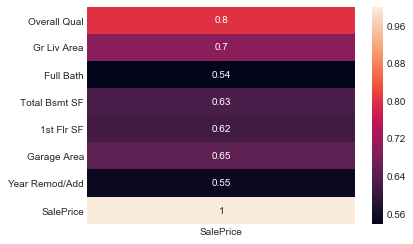

In [1621]:
sns.heatmap(ames_select.corr()[['SalePrice']], annot=True)

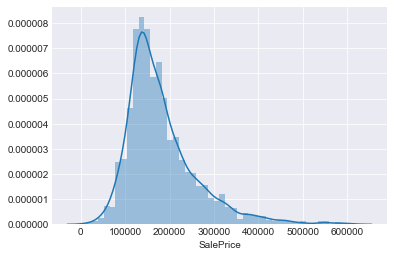

In [1622]:
sns.distplot(ames_select['SalePrice'])

In [1623]:
ames_select_testing['Total Bsmt SF'].fillna(ames_select_testing['Total Bsmt SF'].mean(), inplace=True)

In [1624]:
ames_select_testing['Garage Area'].fillna(ames_select_testing['Garage Area'].mean(), inplace=True)

## Running a log tranformation on the sale price to combat the right skew.

In [1625]:
ames_select['log SalePrice'] = ames_select['SalePrice'].map(np.log)

In [1626]:
ames_select.head()

,Overall Qual,Gr Liv Area,Full Bath,Total Bsmt SF,1st Flr SF,Garage Area,Year Remod/Add,SalePrice,log SalePrice
0,6,1479,2,725.0,725,475.0,2005,130500,11.779129
1,7,2122,2,913.0,913,559.0,1997,220000,12.301383
2,5,1057,1,1057.0,1057,246.0,2007,109000,11.599103
3,5,1444,2,384.0,744,400.0,2007,174000,12.066811
4,6,1445,2,676.0,831,484.0,1993,138500,11.838626


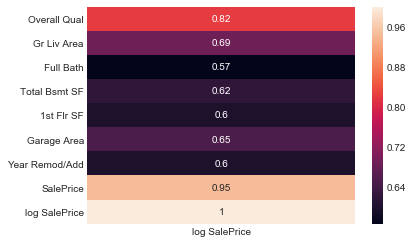

In [1627]:
sns.heatmap(ames_select.corr()[['log SalePrice']], annot=True)

## Train/Test Split

In [1628]:
from sklearn.model_selection import train_test_split

In [1629]:
X = ames_select[[
                      'Overall Qual', 'Gr Liv Area', 
                       'Full Bath', 'Total Bsmt SF',
                        '1st Flr SF', 'Garage Area'
                       , 'Year Remod/Add',]]
y = ames_select['log SalePrice']

In [1630]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [1631]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1025, 7) (1025,)
(1026, 7) (1026,)


In [1632]:
X_train.dtypes

Overall Qual        int64
Gr Liv Area         int64
Full Bath           int64
Total Bsmt SF     float64
1st Flr SF          int64
Garage Area       float64
Year Remod/Add      int64
dtype: object

In [1633]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [1634]:
slr.score(X_train, y_train)

0.7971946398657368

In [1635]:
slr.score(X_test, y_test)

0.8194804322303796

In [1636]:
X_train.columns

Index(['Overall Qual', 'Gr Liv Area', 'Full Bath', 'Total Bsmt SF',
       '1st Flr SF', 'Garage Area', 'Year Remod/Add'],
      dtype='object')

In [1637]:
ames_housing_test.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Lot Shape', 'Land Contour', 'Lot Config', 'Land Slope', 'Neighborhood',
       'Condition 1', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area',
       'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Heating QC', 'Central Air', 'Electrical',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd',
       'Functional', 'Fireplaces', 'Garage Type', 'Garage Yr Blt',
       'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF',
     

In [1638]:
ames_housing_test_for_predictions = ames_housing_test[X_test.columns]

## Running a Cross Validation and Cross Predicted R2

Cross-validated scores: [0.79476097 0.85820252 0.75003977 0.8042544  0.80160721]
Cross-Predicted R2: 0.8021191207841605


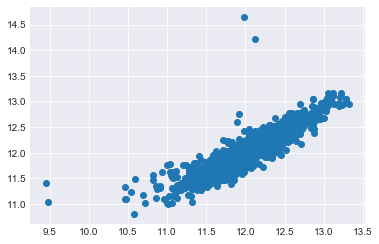

In [1639]:
from sklearn.cross_validation import cross_val_score, cross_val_predict 
from sklearn import metrics 

scores = cross_val_score(slr, X, y, cv=5)
print('Cross-validated scores:', scores)

predictions = cross_val_predict(slr, X, y, cv=5)
plt.scatter(y, predictions)

r2 = metrics.r2_score(y, predictions)
print('Cross-Predicted R2:', r2)

Finding the optimal ridge.alpha

In [1640]:
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X, y)

print(optimal_ridge.alpha_)

30.36771118035459


In [1641]:
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, X, y, cv=10)

print(ridge_scores)
print(np.mean(ridge_scores))

[0.77574564 0.82271952 0.84766026 0.8744691  0.62862957 0.85583188
 0.84693272 0.76376719 0.86604732 0.71959341]
0.8001396626434396


## Linear regression model 

In [1642]:
from sklearn.linear_model import LinearRegression

In [1643]:
lin = LinearRegression()

In [1644]:
lin.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [1645]:
lin.score(X, y)

0.8098921808120892

In [1646]:
y_hat = lin.predict(X)

In [1647]:
ames_select.columns

Index(['Overall Qual', 'Gr Liv Area', 'Full Bath', 'Total Bsmt SF',
       '1st Flr SF', 'Garage Area', 'Year Remod/Add', 'SalePrice',
       'log SalePrice'],
      dtype='object')

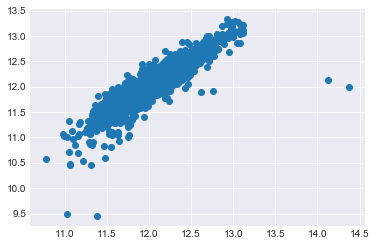

In [1648]:
plt.scatter(y_hat, y)

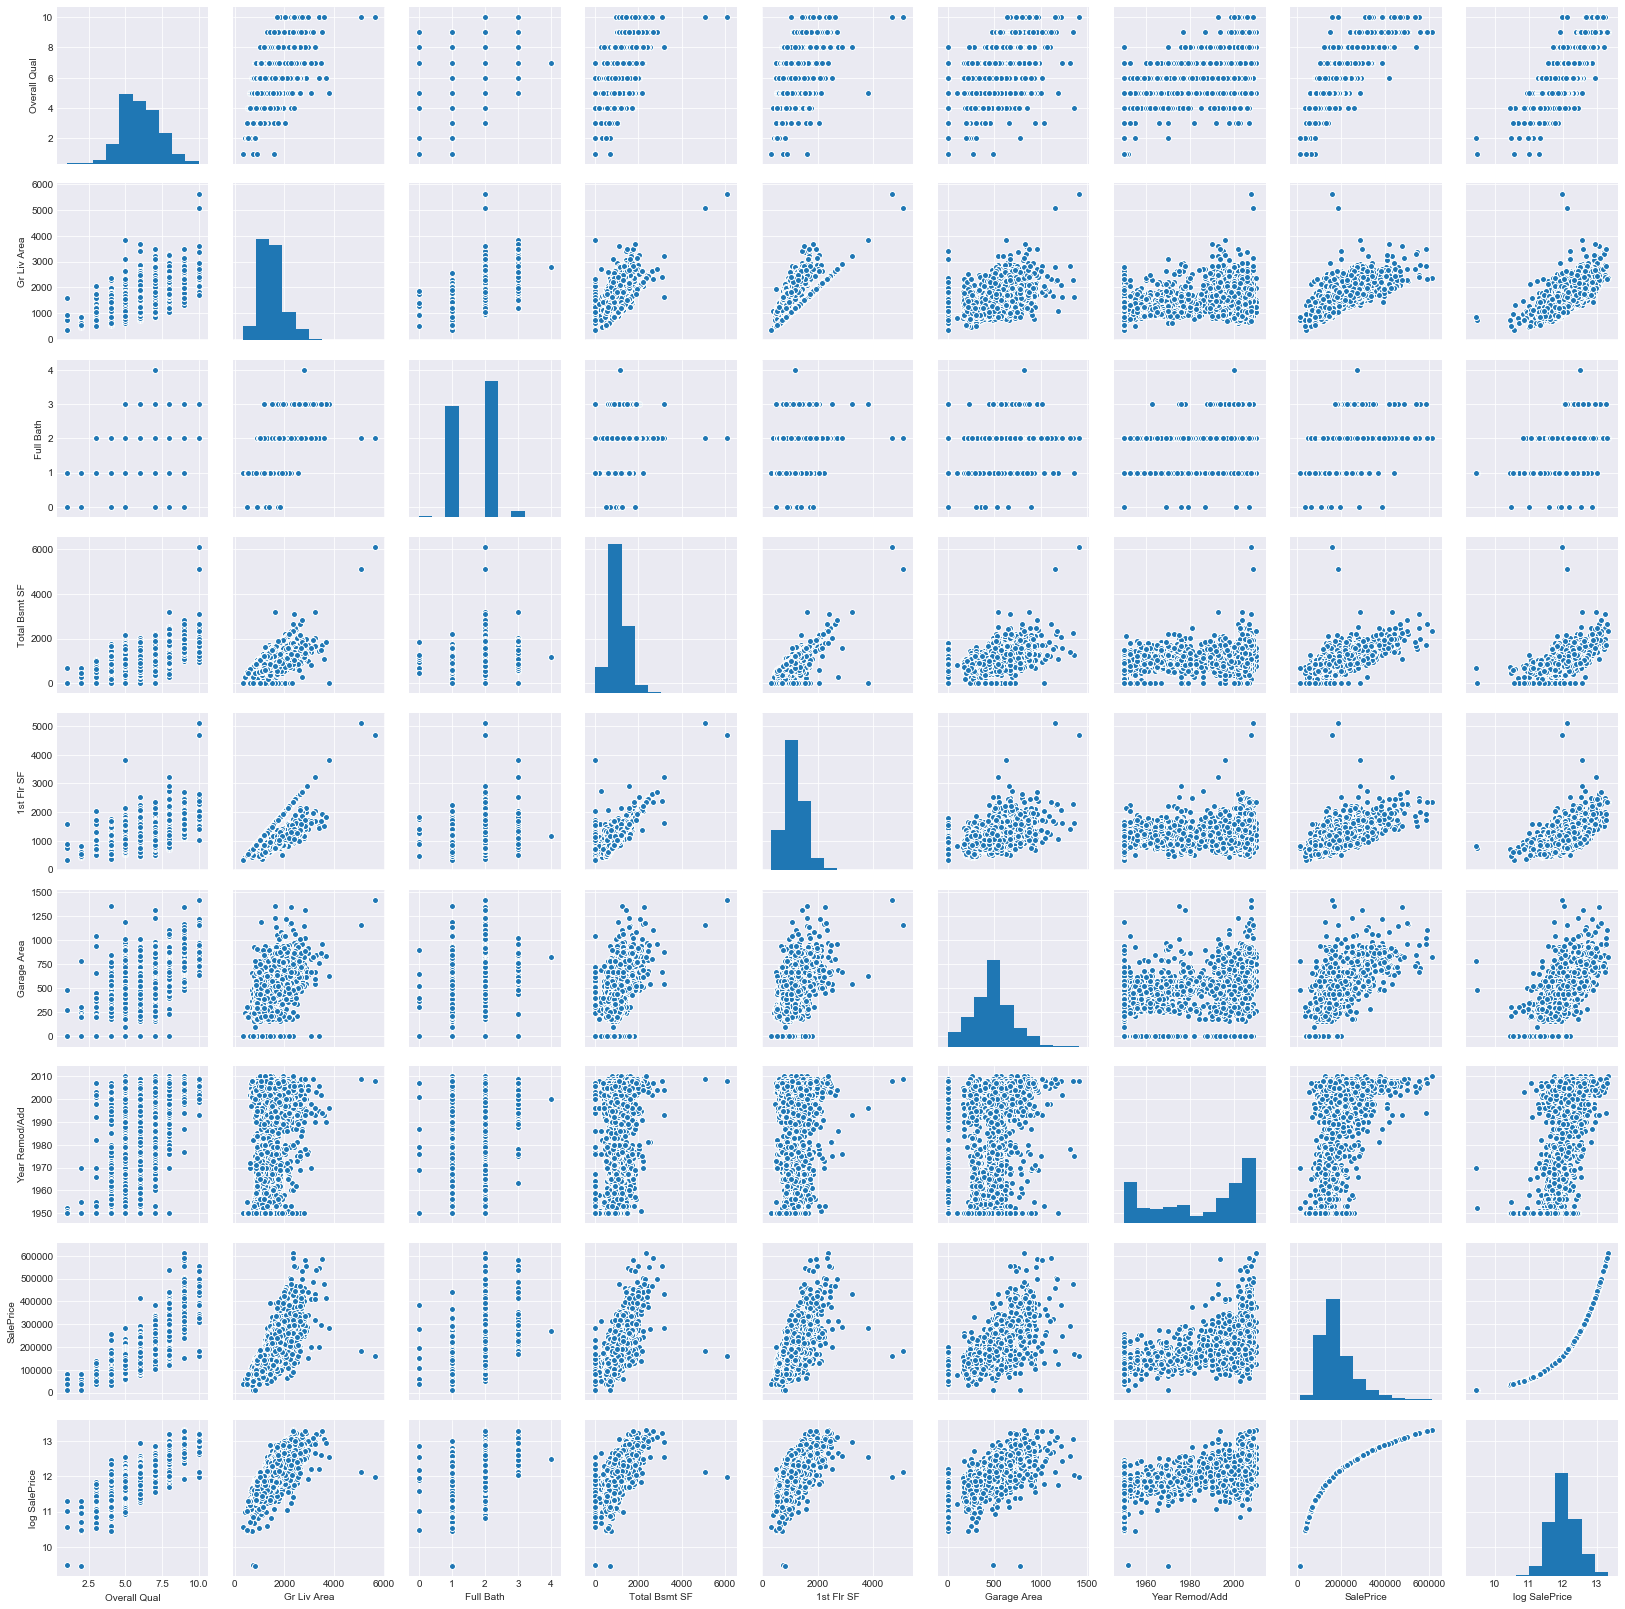

In [1649]:
sns.pairplot(ames_select)

In [1650]:
ames_housing_train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Lot Shape', 'Land Contour', 'Lot Config', 'Land Slope', 'Neighborhood',
       'Condition 1', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area',
       'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Heating QC', 'Central Air', 'Electrical',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd',
       'Functional', 'Fireplaces', 'Garage Type', 'Garage Yr Blt',
       'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF',
     

In [1651]:
## do everything to test.csv that you did to train.csv
## use trained model to create predictions for test.csv
## create a new DF with sale ID and saleprice
## export DF as csv df.to_csv('filepath', index=False)
## upload csv to kaggle

In [1652]:
ames_select.columns

Index(['Overall Qual', 'Gr Liv Area', 'Full Bath', 'Total Bsmt SF',
       '1st Flr SF', 'Garage Area', 'Year Remod/Add', 'SalePrice',
       'log SalePrice'],
      dtype='object')

In [1661]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [1667]:
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [1669]:
rfr.fit(X_test, y_test)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [1668]:
rfr.score(X_train, y_train)

0.9661492168131152

In [1671]:
rfr.score(X_test, y_test)

0.9722293771600903

## Creating the submission dictionary and final CSV file 

In [1672]:
submission_dictionary = {'Id': ames_housing_test['Id'],
                        'SalePrice': np.exp(rfr.predict(ames_housing_test_for_predictions))}

pd.DataFrame(submission_dictionary).to_csv('Ames_Project_2__.csv', index = False)

In [1673]:
pd.read_csv('Ames_Project_2__.csv').shape

(879, 2)

In [1674]:
len(submission_dictionary['Id'])

879